# 課題

In [203]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1-different_shapes.pngの好きな図形を長方形の枠で囲む

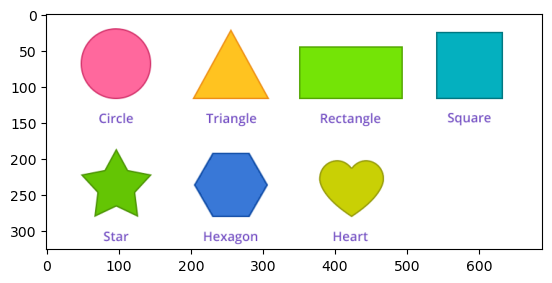

In [204]:
img1 = cv2.imread("C:\\Users\\gokou\\practice\\0523\\img\\different_shapes.png")
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1_rgb)

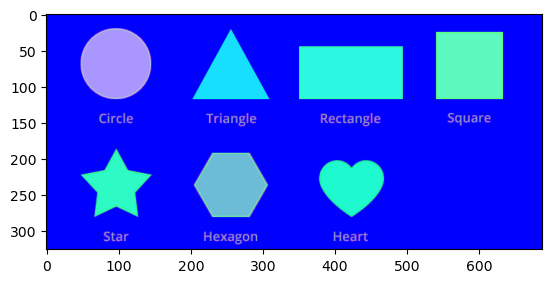

In [205]:
img1_hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
plt.imshow(img1_hsv)

In [206]:
#三角形を検出
h1, s1, v1 = img1_hsv[70, 250]

In [207]:
upper_range1 = np.array([h1+5, s1+30, v1+50])
lower_range1 = np.array([h1-5, s1-30, v1-50])

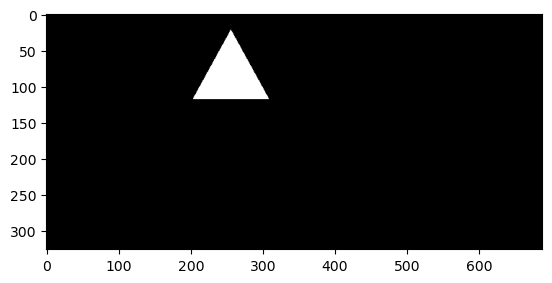

In [208]:
img1_range = cv2.inRange(img1_hsv, lower_range1, upper_range1)
plt.imshow(img1_range, "gray")

In [209]:
contours, hier = cv2.findContours(img1_range, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

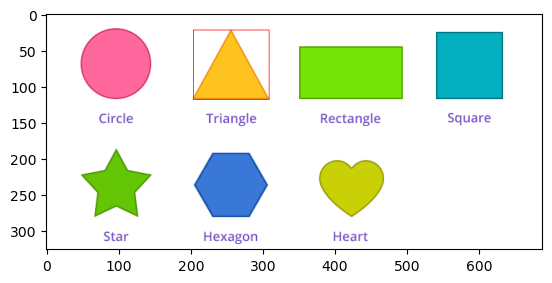

In [210]:
for each_contour in contours:
    x, y, w, h = cv2.boundingRect(each_contour)
    
    cv2.rectangle(img1_rgb, (x, y), (x+w, y+h), (255, 0, 0), 1)
    
plt.imshow(img1_rgb)

## 2-好きな果物の画像を長方形の枠で囲む

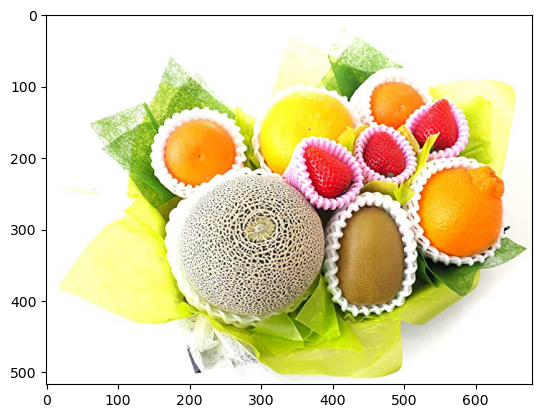

In [211]:
fruits_img = cv2.imread("C:\\Users\\gokou\\practice\\0523\\img\\fruit.jpg")
fruits_rgb = cv2.cvtColor(fruits_img, cv2.COLOR_BGR2RGB)
plt.imshow(fruits_rgb)

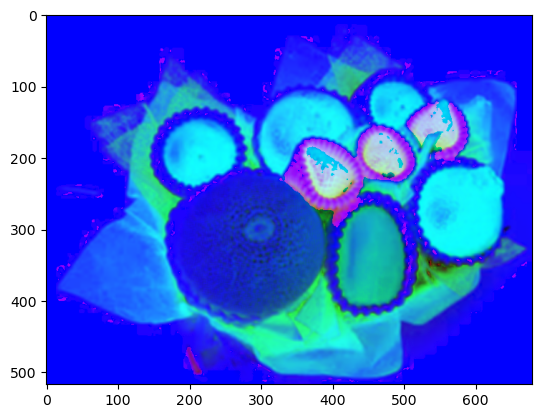

In [212]:
fruits_blur = cv2.blur(fruits_img, (5, 5)) #ぼかさなければHSVの範囲を大きくしないと、上手く検出できない
fruits_hsv =cv2.cvtColor(fruits_blur, cv2.COLOR_BGR2HSV)
plt.imshow(fruits_hsv)

In [213]:
h, s, v = fruits_hsv[200, 450]

In [214]:
upper_range = np.array([h+5, s+50, v+70])
lower_range = np.array([h-5, s-50, v-70])

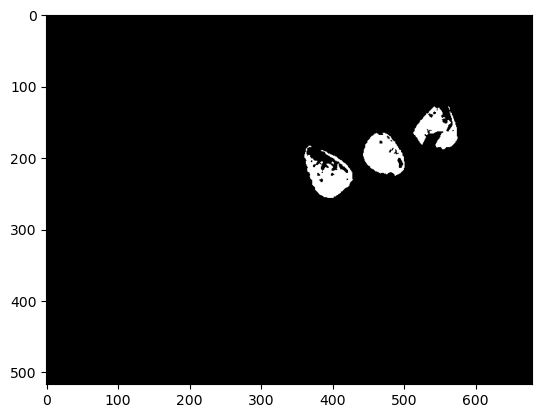

In [215]:
fruits_range = cv2.inRange(fruits_hsv, lower_range, upper_range)
plt.imshow(fruits_range, "gray")

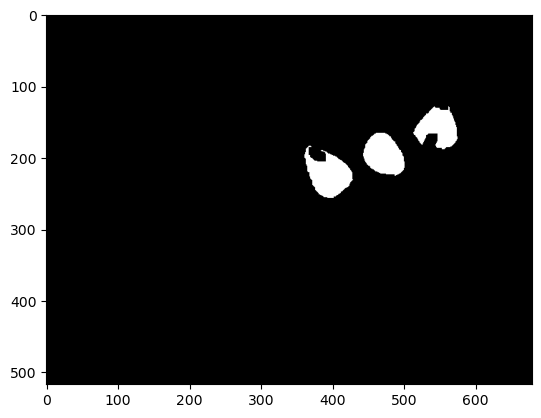

In [216]:
rect_ker = np.ones((3,3))

fruits_dilate = cv2.dilate(fruits_range, rect_ker, iterations=5) #膨張収縮処理5回ずつ
fruits_erode = cv2.erode(fruits_dilate, rect_ker, iterations=5)

plt.imshow(fruits_erode, "gray")

In [217]:
contours, hier = cv2.findContours(fruits_erode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

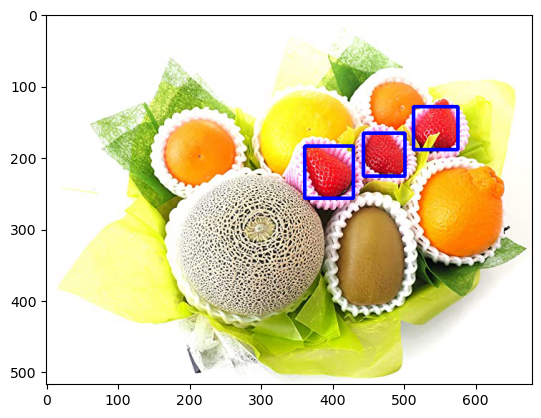

In [218]:
for each_contour in contours:
    x, y, w, h = cv2.boundingRect(each_contour)
    
    cv2.rectangle(fruits_rgb, (x, y), (x+w, y+h), (0, 0, 255), 3)
        
plt.imshow(fruits_rgb)

## 3-cv2.RETR_EXTERNAL, cv2.RETR_LIST, cv2.RETR_TREE, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE について調べる

#### RETR_EXTERNAL       -> 外部の輪郭を検出する。輪郭の中の輪郭は検出されない。
#### RETR_LIST           -> 全ての輪郭を検出する。
#### RETR_TREE           -> 全ての輪郭を検出する。全ての階層構造を保持する。輪郭の中の輪郭は子、孫…の関係になる。
#### RETR_CCOMP          -> 全ての輪郭を検出する。2つのレベルの階層に分類する。RETR_TREEで孫の関係の輪郭は親になる。
#### CHAIN_APPROX_SIMPLE -> 直線の部分の輪郭の点を省略して、座標を取得する。

## 4-cv2.inRange関数を自分で作る

In [219]:
def inrange(img, width, height, lower_range, upper_range):
    for i in range(width):
        for j in range(height):
            h, s, v = img[i][j]
            if (((h > lower_range[0]) and (h < upper_range[0])) and
            ((s > lower_range[1]) and (s < upper_range[1])) and
            ((v > lower_range[2]) and (v < upper_range[2]))):
                img[i][j] = 255 #lowerとupperの範囲内を白
            else:
                img[i][j] = 0 #範囲外を黒
                
    return(img)

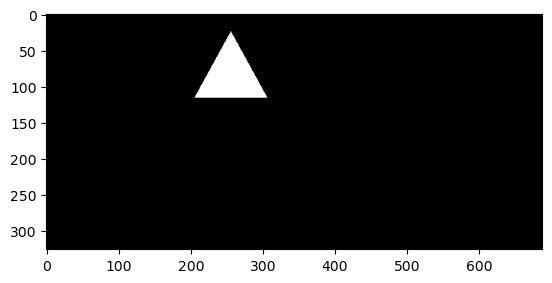

In [220]:
w, h, c = img1_hsv.shape
img_range = inrange(img1_hsv, w, h, lower_range1, upper_range1)
plt.imshow(img_range, "gray")